Ejercicios Planteados
Con el fin de clasificar las distintas actividades que puede realizar una persona, se realizó un experimento a un grupo de 30 voluntarios dentro de un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR,  CAMINAR  POR  LAS  ESCALERAS, BAJAR  LAS  ESCALERAS, SENTARSE, DE PIE, RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se tienen la siguiente data:
•      Aceleración   triaxial   del   acelerómetro   (aceleración   total)   y   la aceleración corporal estimada.
•      Velocidad angular triaxial del giroscopio.
•      Variables de dominio de tiempo y frecuencia.
•      Su etiqueta de actividad.
•      Un identificador del sujeto que realizó el experimento.
El  conjunto  de  datos  obtenido  se  ha  dividido  aleatoriamente  en  dos conjuntos (train y test), donde se seleccionó al 70% de los voluntarios para generar los datos de entrenamiento y al 30% los datos de la prueba.

a) Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las dimensiones de estos set de datos?

In [19]:
# Importamos la librería pandas
import pandas as pd
#importamos la librería para gratificar las variables
import matplotlib.pyplot as plt

# Definimos la ruta de los datos
ruta_test = './datos/test.csv'
ruta_train = './datos/train.csv'

# Cargamos los datos
test = pd.read_csv(ruta_test)
train = pd.read_csv(ruta_train)

# Mostramos los datos

print('Datos de test:')
print(test.head())
print('Datos de train:')
print(train.head())

# Mostramos las dimensiones de los datos
print('Dimensiones de test:', test.shape)
print('Dimensiones de train:', train.shape)



Datos de test:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ..

b) Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento.  Para  esto,  una  opción  es  utilizar  la  función  de  pandas crosstab(index=columna, columns="count"). ¿Cómo se encuentran repartidas las Actividades? ¿Existe algún desbalance en las categorías? (realice un gráfico que acompañe su análisis) Comente.

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073
Columnas de test: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


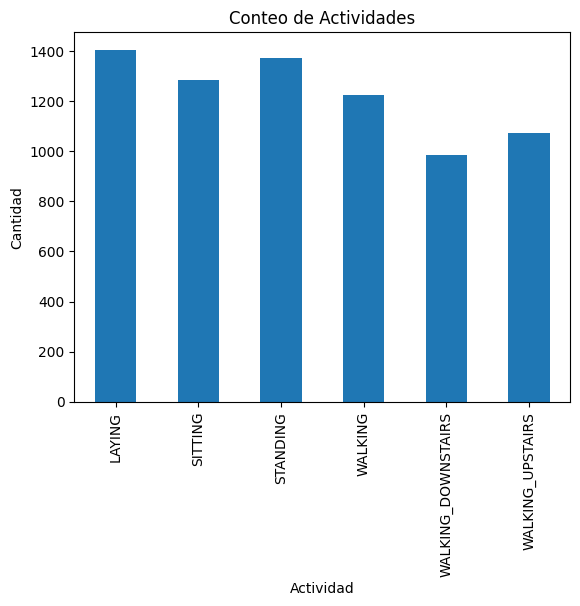

In [20]:
# Contar la cantidad de registros en cada actividad
conteo_actividades = pd.crosstab(index=train['Activity'], columns="count")

# Mostrar el conteo de actividades
print(conteo_actividades)

#mostrar las columnas de los datos
print('Columnas de test:', test.columns)

# Gratificar el conteo de actividades
conteo_actividades.plot(kind='bar', legend=False)

plt.title('Conteo de Actividades')
plt.xlabel('Actividad')
plt.ylabel('Cantidad')
plt.show()



El gráfico de barras muestra la distribución de seis actividades diferentes: LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS y WALKING_UPSTAIRS, junto con sus respectivos recuentos. Aquí está el análisis:

LAYING: Con 1407 instancias, es la actividad más frecuente en el conjunto de datos.
SITTING: Le sigue de cerca con 1286 instancias.
STANDING: También es común, con 1374 instancias.
WALKING: Aunque aún es significativo, tiene 1226 instancias.
WALKING_DOWNSTAIRS: Tiene un número menor de instancias, con 986.
WALKING_UPSTAIRS: Es la menos común, con 1073 instancias.
En general, las actividades de reposo (LAYING, SITTING y STANDING) son más frecuentes que las actividades de movimiento (WALKING y escaleras). Este desequilibrio podría afectar el rendimiento de un modelo de aprendizaje automático, especialmente si se busca predecir actividades menos comunes.

c) Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).

In [21]:
# Para X_test, tomamos todas las columnas de 'test' excepto 'Activity'
X_test = test.drop('Activity', axis=1)

# Y_test es simplemente la columna 'Activity' de 'test'
Y_test = test['Activity']

# Hacemos lo mismo para el conjunto de entrenamiento: para X_train, tomamos todas las columnas de 'train' excepto 'Activity'
X_train = train.drop('Activity', axis=1)

# Y_train es simplemente la columna 'Activity' de 'train'
Y_train = train['Activity']

d) Estandarice el set de features de entrenamiento y prueba. Recuerde que puede utilizar la función vista en clases StandardScaler:
from sklearn.preprocessing import StandardScaler
x_stand = StandardScaler().fit_transform(x)

In [22]:
from sklearn.preprocessing import StandardScaler

# Crear el estandarizador
scaler = StandardScaler()

# Ajustar el estandarizador con los datos de entrenamiento y transformarlos
X_train_stand = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el estandarizador ajustado con los datos de entrenamiento
X_test_stand = scaler.transform(X_test)

e) Defina  y_train  e  y_test  como  corresponda  (recuerde  que  debe  estar codificada numéricamente). Para recodificar un vector o columna y de varias categorías a formato numérico puede utilizar:
•      from sklearn import preprocessing
•      encoder=preprocessing.LabelEncoder().fit(y)
•      y_new=encodertrain.transform(y)

In [23]:
from sklearn import preprocessing

# Crear el codificador
encoder = preprocessing.LabelEncoder()

# Ajustar el codificador a las etiquetas de entrenamiento y prueba
encoder.fit(pd.concat([Y_train, Y_test]))

# Transformar las etiquetas de entrenamiento y prueba
Y_train_encoded = encoder.transform(Y_train)
Y_test_encoded = encoder.transform(Y_test)

# Imprimir los resultados
print("Y_train_encoded: ", Y_train_encoded)
print("Y_test_encoded: ", Y_test_encoded)

Y_train_encoded:  [2 2 2 ... 5 5 5]
Y_test_encoded:  [2 2 2 ... 5 5 5]


f) Defina un diccionario con las opciones de:
•      El kernel se mueva entre linear o rbf
•      El C se mueva entre los valores 10 y 15

In [24]:
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [10, 15]
}

# Imprimir el diccionario
print(param_grid)

{'kernel': ['linear', 'rbf'], 'C': [10, 15]}


g) Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con la  lista  de  parámetros  definida  anteriormente.  Determine  la  mejor combinación de parámetros y obtenga el modelo con dichos parámetros.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=10)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, Y_train_encoded)

# Obtener la mejor combinación de parámetros
best_params = grid_search.best_params_

# Obtener el modelo con la mejor combinación de parámetros
best_model = grid_search.best_estimator_

# Predecir las etiquetas para el conjunto de prueba
Y_test_pred = best_model.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = best_model.score(X_test, Y_test_encoded)

# Imprimir la precisión
print("Precisión del modelo en el conjunto de prueba: ", accuracy)




Precisión del modelo en el conjunto de prueba:  0.9596199524940617


h) ¿Cómo es la capacidad predictiva de este modelo en el set de prueba? Comente.

La precisión obtenida es aproximadamente 0.96, lo que indica un buen rendimiento del modelo en la clasificación

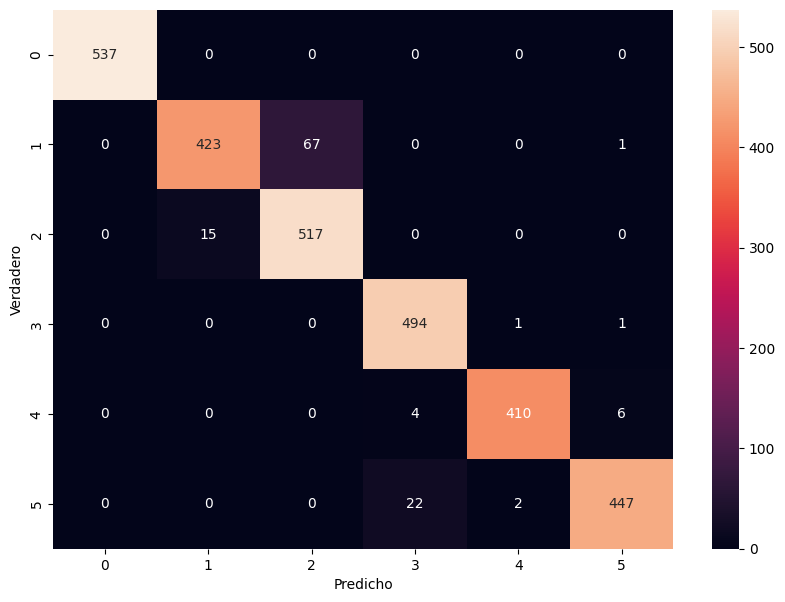

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test_encoded, Y_test_pred)

# Crear un mapa de calor a partir de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')

plt.show()

In [28]:
from sklearn.metrics import classification_report

# Generar informe de clasificación
report = classification_report(Y_test_encoded, Y_test_pred)

print(report)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.86      0.91       491
           2       0.89      0.97      0.93       532
           3       0.95      1.00      0.97       496
           4       0.99      0.98      0.98       420
           5       0.98      0.95      0.97       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



El informe de clasificación proporciona una evaluación detallada del rendimiento del modelo de clasificación en cada clase. Aquí está la interpretación de las métricas clave:

Precisión (Precision): La precisión mide la proporción de predicciones positivas correctas respecto a todas las predicciones positivas. En promedio, el modelo tiene una precisión del 96%. Esto significa que, en general, cuando predice una clase como positiva, es correcto en un 96% de las veces.
Recuerdo (Recall): El recuerdo mide la proporción de verdaderos positivos respecto a todas las muestras positivas reales. En promedio, el modelo tiene un recuerdo del 96%. Esto indica que el modelo captura correctamente el 96% de todas las muestras positivas.
Valor F1 (F1 Score): El valor F1 combina precisión y recuerdo en una sola métrica. En promedio, el valor F1 es del 96%, lo que sugiere un buen equilibrio entre precisión y recuerdo.
Exactitud (Accuracy): La exactitud mide la proporción de muestras correctamente clasificadas. En este caso, la exactitud es del 96%, lo que indica un buen rendimiento general del modelo.
En resumen, el modelo tiene un rendimiento sólido en la mayoría de las clases, con una precisión, recuerdo y valor F1 altos. Sin embargo, es importante considerar el contexto específico del problema y las implicaciones de los errores (falsos positivos y falsos negativos) para determinar si el rendimiento es satisfactorio para tus necesidades específicas.